In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

path = r"C:\\Users\\Hp\\Python\\Data\\Animation_Movies.csv"

df = pd.read_csv(path)
df.head(1)

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages
0,150540,Inside Out,7.922,19463,Released,2015-06-09,857611174,95,False,/j29ekbcLpBvxnGk6LjdTc2EI5SA.jpg,...,en,Inside Out,"Growing up can be a bumpy road, and it's no ex...",107.292,/2H1TmgdfNtsKlU9jKdeNyYL5y8T.jpg,Meet the little voices inside your head.,"Animation, Family, Adventure, Drama, Comedy","Pixar, Walt Disney Pictures",United States of America,English


In [2]:
# Cleaning Data
df.columns
df.shape
# df.info()
df.drop(['backdrop_path' , 'overview' , 'poster_path' , 'imdb_id'] , inplace = True , axis = 1)
df[id] = df['id'].sort_values()
df

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,homepage,original_language,original_title,popularity,tagline,genres,production_companies,production_countries,spoken_languages,2599304308944
0,150540,Inside Out,7.922,19463,Released,2015-06-09,857611174,95,False,175000000,http://movies.disney.com/inside-out,en,Inside Out,107.292,Meet the little voices inside your head.,"Animation, Family, Adventure, Drama, Comedy","Pixar, Walt Disney Pictures",United States of America,English,150540
1,14160,Up,7.949,18857,Released,2009-05-28,735099082,96,False,175000000,http://disney.go.com/disneypictures/up/,en,Up,90.968,The greatest adventure is just getting back home.,"Animation, Comedy, Family, Adventure",Pixar,United States of America,English,14160
2,12,Finding Nemo,7.824,18061,Released,2003-05-30,940335536,100,False,94000000,http://movies.disney.com/finding-nemo,en,Finding Nemo,55.456,There are 3.7 trillion fish in the ocean. They...,"Animation, Family",Pixar,United States of America,English,12
3,354912,Coco,8.222,17742,Released,2017-10-27,800526015,105,False,175000000,https://www.pixar.com/feature-films/coco,en,Coco,166.578,The celebration of a lifetime,"Family, Animation, Fantasy, Music, Comedy, Adv...","Pixar, Walt Disney Pictures",United States of America,"English, Spanish",354912
4,10681,WALL·E,8.078,17446,Released,2008-06-22,521311860,98,False,180000000,https://www.pixar.com/feature-films/walle/,en,WALL·E,58.517,After 700 years of doing what he was built for...,"Animation, Family, Science Fiction","Pixar, Walt Disney Pictures",United States of America,English,10681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51940,656677,Белозубка,0.000,0,Released,2018-12-20,0,0,False,0,NaN,ru,Белозубка,0.600,NaN,Animation,NaN,Russia,NaN,656677
51941,657149,Shimajiro to Ururu no Heroland,0.000,0,Released,2019-03-15,0,60,False,0,https://kodomo.benesse.ne.jp/open/movie/2019/,ja,映画しまじろう しまじろうとうるるのヒーローランド,2.531,NaN,"Family, Animation, Fantasy","Benesse, Sony Music Direct, TOHO, The Answer S...",Japan,"Japanese, English, Mandarin",657149
51942,656945,Robo Force: The Revenge of Nazgar,0.000,0,Released,1984-12-08,0,22,False,0,NaN,en,Robo Force: The Revenge of Nazgar,1.952,NaN,"Animation, Action, Science Fiction",NaN,NaN,English,656945
51943,656893,Beginning Responsibility: A Lunchroom Goes Ban...,0.000,0,Released,1978-01-01,0,12,False,0,NaN,en,Beginning Responsibility: A Lunchroom Goes Ban...,0.600,NaN,"Animation, Documentary, Family",Coronet Films,NaN,English,656893


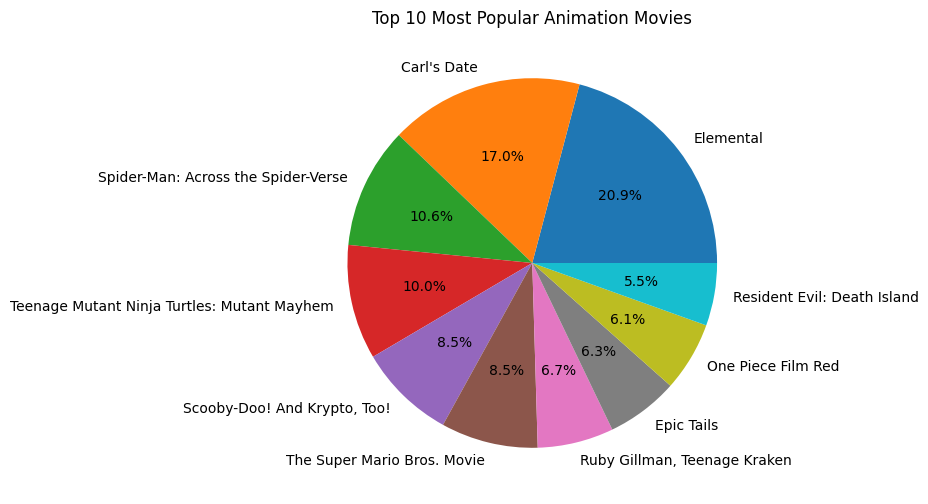

In [3]:
# Sorting by 'popularity' column in descending order
animation_data_sorted = df.sort_values(by='popularity', ascending=False)
top_10_popular_movies = animation_data_sorted.head(10)
plt.figure(figsize=(6, 6))
plt.pie(top_10_popular_movies['popularity'], labels=top_10_popular_movies['title'], autopct='%1.1f%%', startangle=360)

plt.title('Top 10 Most Popular Animation Movies')
# plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


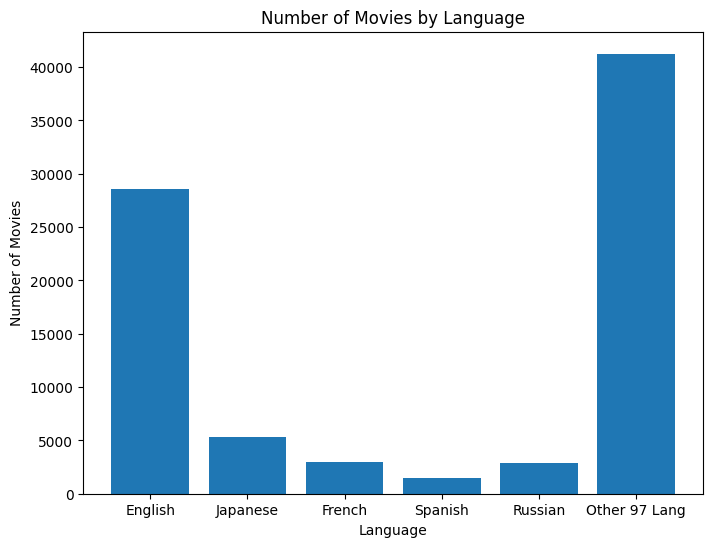

In [4]:
eng = df[df['original_language'] == 'en']
jap = df[df['original_language'] == 'ja']
fra = df[df['original_language'] == 'fr']
rus = df[df['original_language'] == 'ru']
spa = df[df['original_language'] == 'es']

other_languages = df[df['original_language'].isin(['ja', 'en' , 'fr' , 'ru' ,'es'])]  # Filter out English and Japanese
# Get counts for each language category
eng_count = len(eng)
jap_count = len(jap)
fra_count = len(fra)
rus_count = len(rus)
spa_count = len(spa)
other_count = len(other_languages)
# print(other_count)


plt.figure(figsize=(8, 6))
plt.title("Number of Movies by Language")

plt.bar(['English', 'Japanese','French','Spanish','Russian' ,'Other 97 Lang'], 
        [eng_count, jap_count, fra_count,spa_count ,rus_count , other_count])
plt.xlabel("Language")
plt.ylabel("Number of Movies")
plt.show()


In [5]:
# Create a copy of the DataFrame
df_modify = df.copy()

# Drop rows where either budget or revenue is zero
df_modify = df_modify[(df_modify['budget'] != 0) & (df_modify['revenue'] != 0)]

# Print the modified DataFrame
df_modify.head(1)



,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,homepage,original_language,original_title,popularity,tagline,genres,production_companies,production_countries,spoken_languages,2599304308944
0,150540,Inside Out,7.922,19463,Released,2015-06-09,857611174,95,False,175000000,http://movies.disney.com/inside-out,en,Inside Out,107.292,Meet the little voices inside your head.,"Animation, Family, Adventure, Drama, Comedy","Pixar, Walt Disney Pictures",United States of America,English,150540


Top 10 Movies with the Lowest Revenue to Budget Ratio:
                                   title    budget  revenue  \
2706                 The Magic Snowflake  10000000       78   
29487    Verbalase/Charlie - "Hide Away"     50000        1   
8759    Go! Go! Cory Carson: The Chrissy     50000       34   
10030  A Go! Go! Cory Carson Summer Camp      5000        4   
1446                          Foodfight!  65000000    73706   
4420                              Strike  16800000    24743   
1375             A Troll in Central Park  23000000    71368   
3912              Jackboots on Whitehall   6000000    20776   
2062         Snoop Dogg's Hood of Horror   5000000    25900   
26002                      Terminal Crab      4000       25   

       revenue_budget_ratio  
2706               0.000008  
29487              0.000020  
8759               0.000680  
10030              0.000800  
1446               0.001134  
4420               0.001473  
1375               0.003103  
3912       

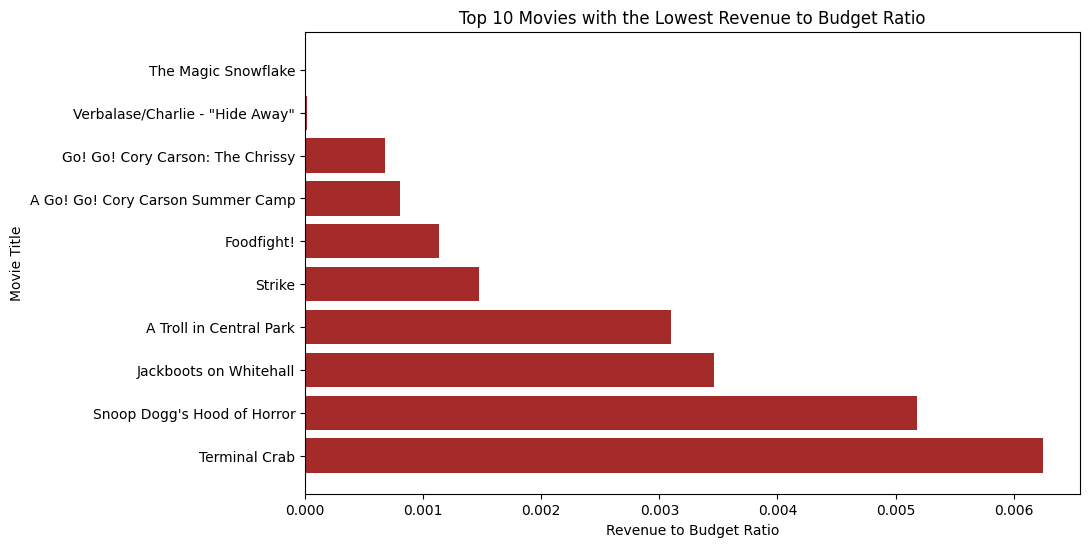

In [16]:
df_modify['revenue_budget_ratio'] = df_modify['revenue'] / df_modify['budget']
df_sorted = df_modify.sort_values(by='revenue_budget_ratio', ascending=True)
ratio_dataframe = df_sorted.head(10)[['title','budget','revenue', 'revenue_budget_ratio']]

titles_to_drop = [ 'Star Wars: The Clone Wars', 'Zombi' , '10+2: The Great Secret' , 
                  'Zombie Attack' ,'Star Wars: The Clone Wars','De olhos abertos']
drop_rows_mask = ratio_dataframe['title'].isin(titles_to_drop)
rows_to_drop = ratio_dataframe[drop_rows_mask].index
df_modify.drop(rows_to_drop, axis=0, inplace=True)

# Calculating the revenue to budget ratio
# Select the top 10 movies with the lowest revenue to budget ratio


print("Top 10 Movies with the Lowest Revenue to Budget Ratio:")
print(ratio_dataframe)


# Creating barGraph
plt.figure(figsize=(10, 6))
plt.barh(ratio_dataframe['title'], 
         ratio_dataframe['revenue_budget_ratio'], 
         color='brown')
plt.xlabel('Revenue to Budget Ratio')
plt.ylabel('Movie Title')
plt.title('Top 10 Movies with the Lowest Revenue to Budget Ratio')
plt.gca().invert_yaxis()  # Invert y-axis to display the movie with the lowest ratio at the top
plt.show()

Top 10 Movies with the Highest Revenue to Budget Ratio:
                                 title    budget    revenue  \
99                               Bambi    858000  267447150   
39597           10+2: The Great Secret         1        246   
180           Dragon Ball Super: Broly   1000000  125002821   
63     Snow White and the Seven Dwarfs   1488423  184925486   
76                          Cinderella   2900000  263591415   
40362                Little Tikes Land    100000    9000000   
34940                    Zombie Attack        52       3300   
202                       The Rescuers   1200000   71215869   
85                     The Jungle Book   4000000  205843612   
726                             Ne Zha  20000000  742500000   

       revenue_budget_ratio  
99               311.709965  
39597            246.000000  
180              125.002821  
63               124.242561  
76                90.893591  
40362             90.000000  
34940             63.461538  
202       

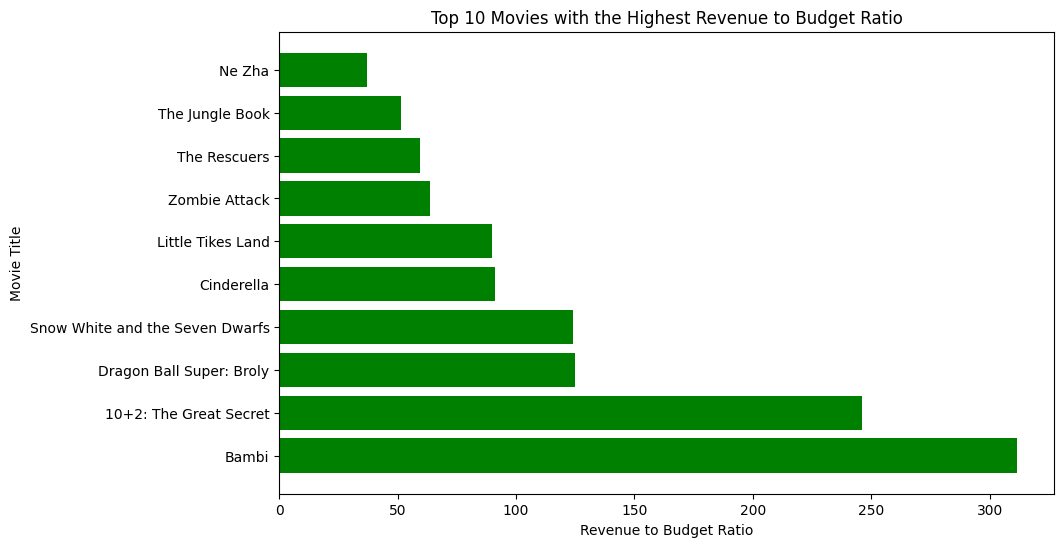

In [17]:
df_modify['revenue_budget_ratio'] = df_modify['revenue'] / df_modify['budget']
df_sorted = df_modify.sort_values(by='revenue_budget_ratio', ascending=False)
# Selecting the top 10 movies with the Highest revenue to budget ratio
ratio_dataframe = df_sorted.head(10)[['title','budget','revenue', 'revenue_budget_ratio']]

print("Top 10 Movies with the Highest Revenue to Budget Ratio:")
print(ratio_dataframe)


# Create a baGraph
plt.figure(figsize=(10, 6))
plt.barh(ratio_dataframe['title'], 
         ratio_dataframe['revenue_budget_ratio'], 
         color='Green')
plt.xlabel('Revenue to Budget Ratio')
plt.ylabel('Movie Title')
plt.title('Top 10 Movies with the Highest Revenue to Budget Ratio')
plt.show()

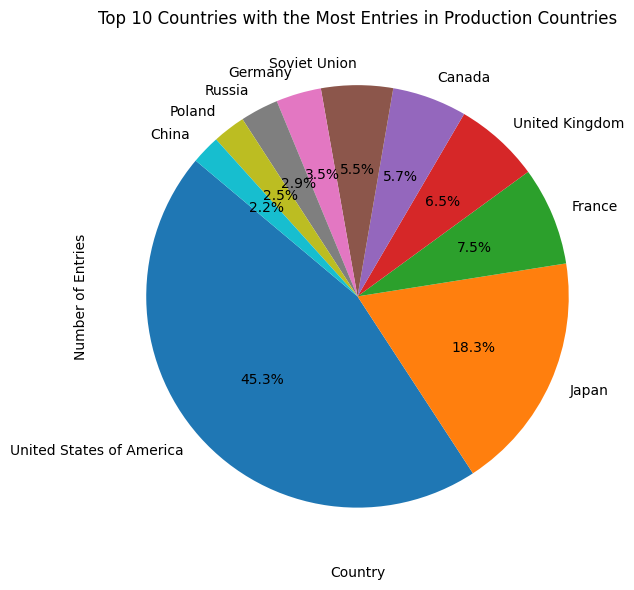

In [18]:
top_10 = df['production_countries'].value_counts().head(10)
plt.figure(figsize=(10, 6))
# top_10.plot(kind='bar')
plt.pie(top_10, labels=top_10.index, autopct='%1.1f%%', startangle=140)
plt.xlabel('Country')
plt.ylabel('Number of Entries')
plt.title('Top 10 Countries with the Most Entries in Production Countries')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

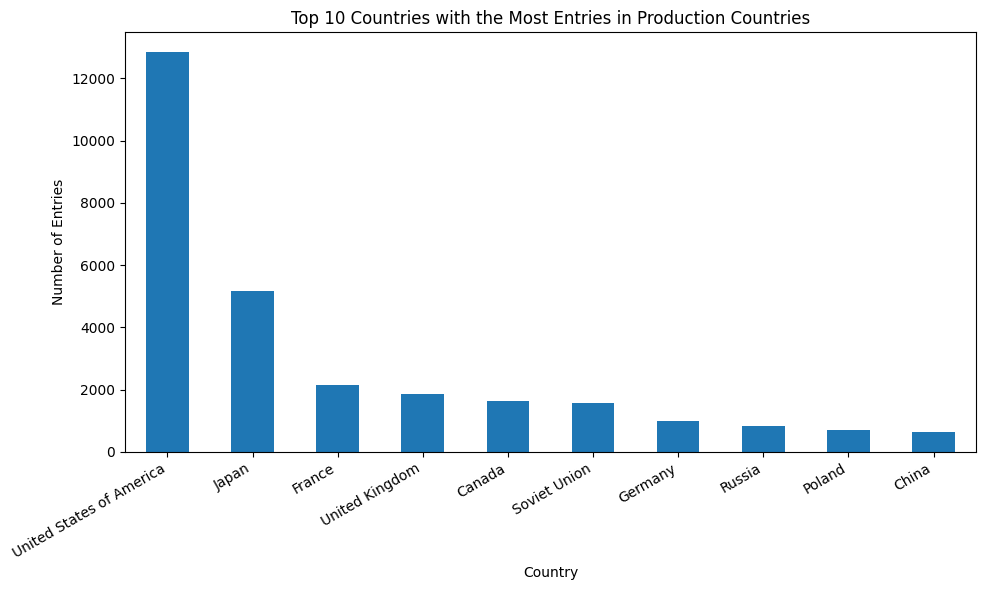

In [20]:
top_10 = df['production_countries'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_10.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Number of Entries')
plt.title('Top 10 Countries with the Most Entries in Production Countries')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

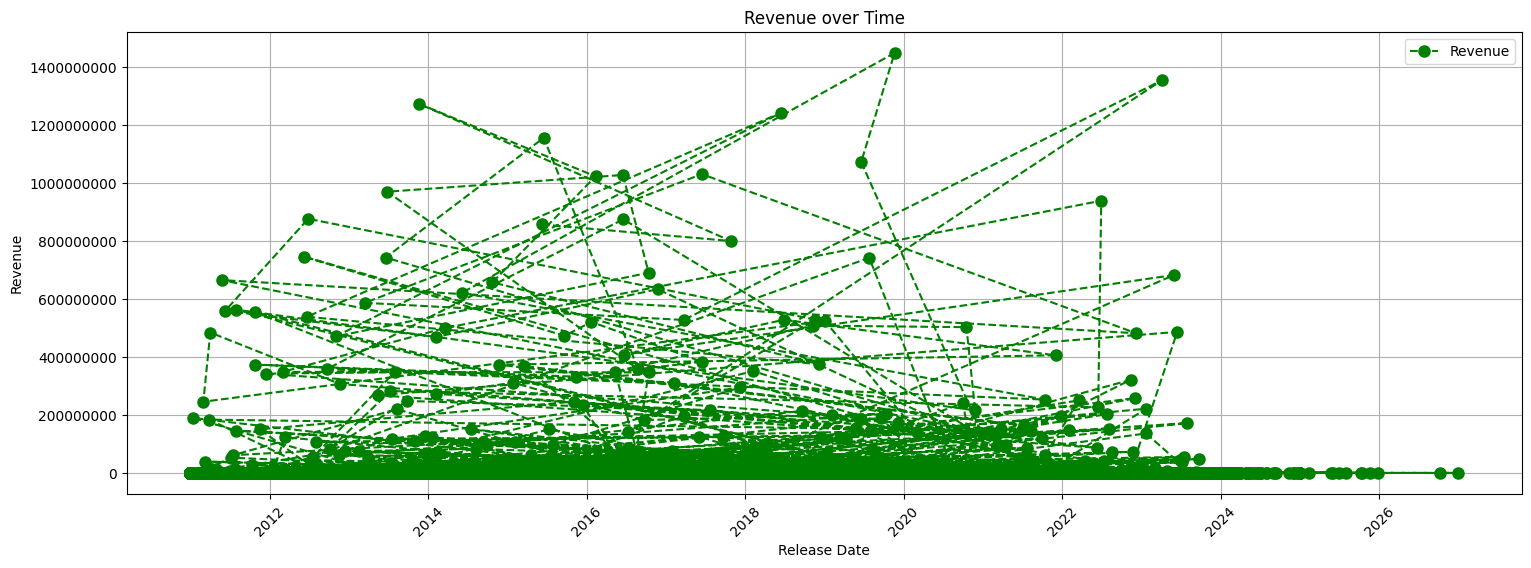

In [10]:

# Assuming df is your DataFrame and 'release_date' is the name of the release date column
df['release_date'] = pd.to_datetime(df['release_date'])

# Filter movies released after the 1990s
movies_after = df[df['release_date'].dt.year > 2010]
plt.figure(figsize=(18, 6))
plt.xlabel('Release Date')
plt.ylabel('Revenue')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Revenue over Time')

# Plotting revenue against release date for movies released after the 1990s
plt.plot(movies_after['release_date'], movies_after['revenue'], color='green', linestyle='dashed', marker='o', markersize=8, label='Revenue')

plt.legend()  # Show legend
plt.grid(True)  # Show grid
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()


In [11]:
# print(movies_after.count())
movies_after['release_year'] = movies_after['release_date'].dt.year

unique_years = movies_after['release_date'].dt.year.unique()
print(unique_years)
# Group by release year and calculate the average revenue for each year
average_revenue_by_year = movies_after.groupby('release_year')['revenue'].mean()
print(average_revenue_by_year)
# Find the year with the highest average revenue
highest_average_revenue_year = average_revenue_by_year.idxmax()

print("Year with the highest average revenue:", highest_average_revenue_year)

[2015 2017 2013 2016 2014 2018 2012 2020 2019 2021 2011 2023 2022 2024
 2025 2026]
release_year
2011    4.439523e+06
2012    3.979136e+06
2013    4.624273e+06
2014    2.912743e+06
2015    3.628833e+06
2016    5.152181e+06
2017    2.803719e+06
2018    2.762669e+06
2019    2.870526e+06
2020    6.214567e+05
2021    9.158610e+05
2022    1.535257e+06
2023    1.732947e+06
2024    1.262136e-01
2025    0.000000e+00
2026    0.000000e+00
Name: revenue, dtype: float64
Year with the highest average revenue: 2016


C:\Users\Hp\AppData\Local\Temp\ipykernel_7020\3840753201.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_after['release_year'] = movies_after['release_date'].dt.year


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


production_companies
Pixar, Walt Disney Pictures                                       7934987635
Illumination, Universal Pictures                                  4752136567
Walt Disney Pictures, Walt Disney Animation Studios               4555772760
DreamWorks Animation, Paramount                                   4131753443
Blue Sky Studios, 20th Century Fox Animation, 20th Century Fox    3934506069
Walt Disney Pictures, Walt Disney Feature Animation               3902741165
Pixar                                                             3863299965
Walt Disney Pictures, Pixar                                       3639185553
Walt Disney Animation Studios, Walt Disney Pictures               2664908810
DreamWorks Animation, 20th Century Fox                            2238904436
Name: revenue, dtype: int64


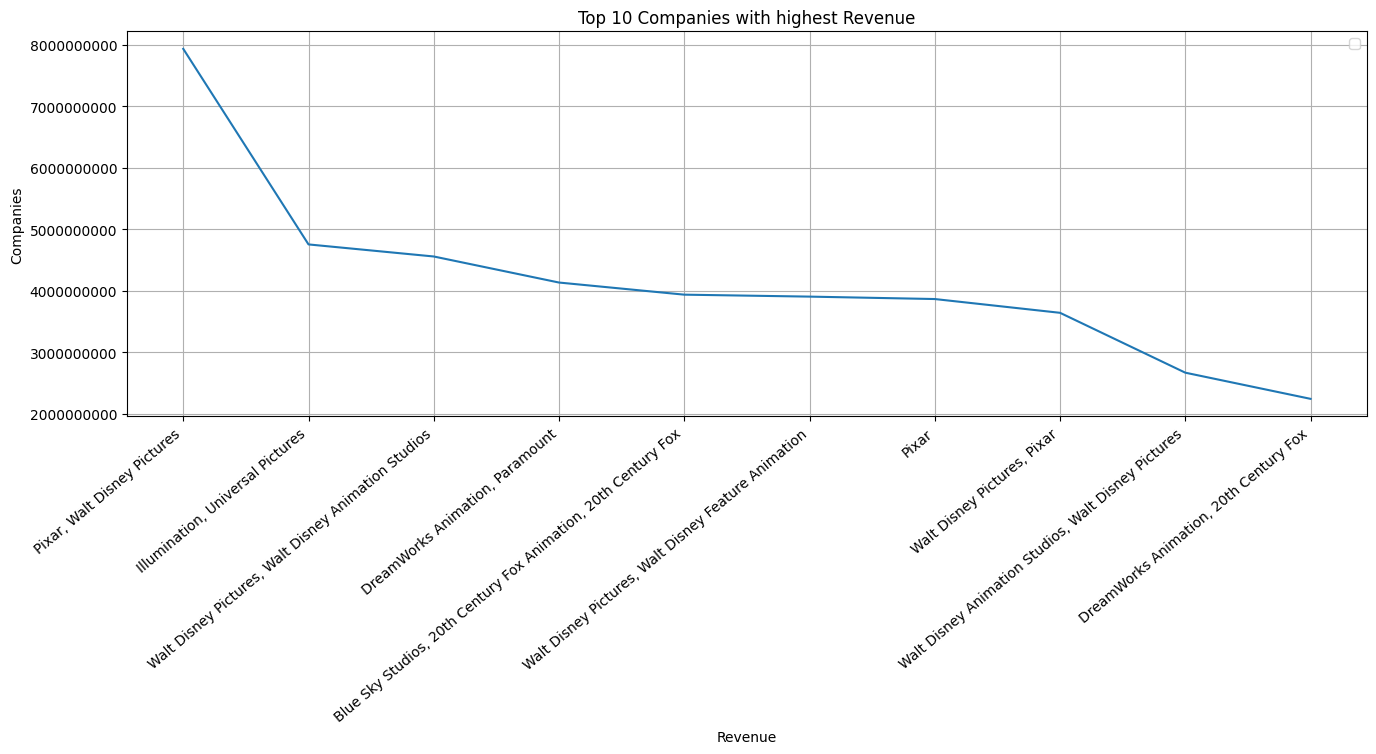

In [22]:
# Grouping the DataFrame by 'production_companies' and sum the revenue for each studio
profit_by_studio = df.groupby('production_companies')['revenue'].sum()
# Fstudios with the highest total revenue
most_profitable_studios = profit_by_studio.nlargest(10)
print(most_profitable_studios)

plt.figure(figsize = (16,5))
plt.plot(most_profitable_studios.index , most_profitable_studios)
plt.title("Top 10 Companies with highest Revenue")
plt.xlabel("Revenue")
plt.ylabel("Companies")
plt.xticks( rotation = 40, ha='right')
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)
plt.legend() 


In [ ]:
df.head(1)
df['release_year'] = df['release_date'].dt.year
popularity_trend = df.groupby('release_date')['popularity'].mean()

# Plot the trend
plt.figure(figsize=(10, 6))
plt.plot(popularity_trend.index, popularity_trend.values, marker='o', color='blue', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.title('Trend of Animation Movie Popularity Over Years')
plt.grid(True)
plt.xticks(popularity_trend.index, rotation=45)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Trend of Animation Movie Popularity Over Years')

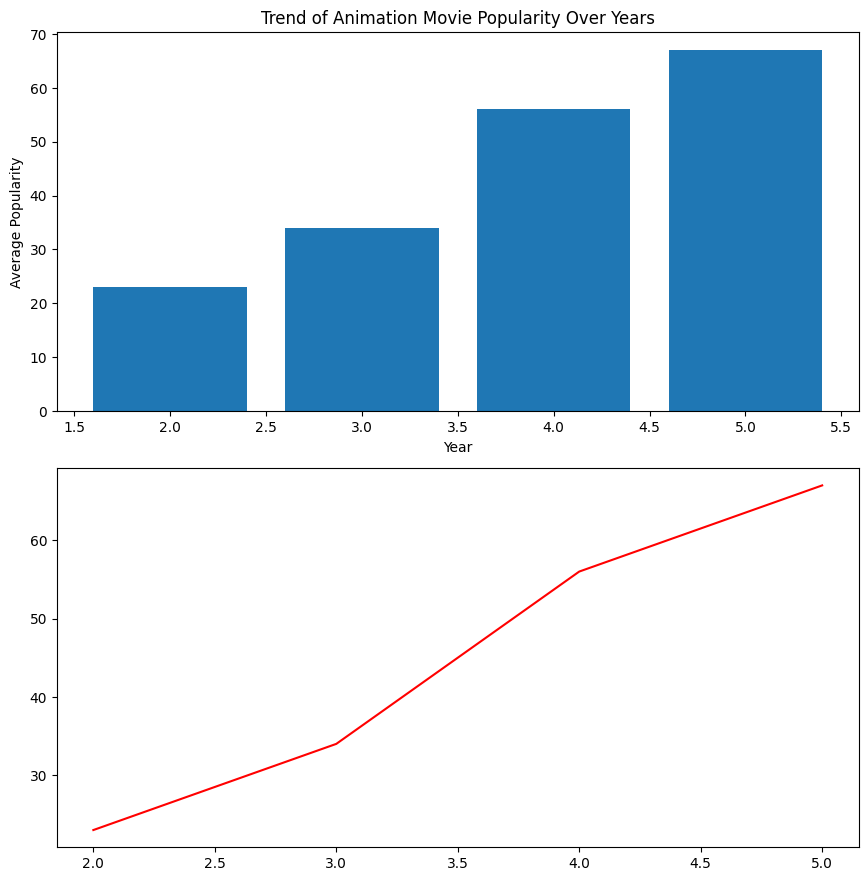

In [4]:

years = [2,3,4,5]
apples = [23,34,56,67]
fig , axes = plt.subplots(2,1 , figsize = (9,9))
plt.tight_layout(pad = 2)
axes[1].plot(years , apples , color = 'red')

# axes[0].bar(years , apples)
# axes[0].set_xticklabels(most_profitable_studios.index, rotation=45)
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Average Popularity')
axes[0].set_title('Trend of Animation Movie Popularity Over Years')
# axes[0, 1].set_xticks(range(len(popularity_trend.index)))
